<a href="https://colab.research.google.com/github/dushyantnagar7806/Handling-imbalanced_dataset-/blob/main/Class_imblance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Using Artificial Neural Network (ANN)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import warnings as w
w.filterwarnings('ignore')

### Load Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Class_Imblance/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6113,1228-ZLNBX,Male,0,No,No,21,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,75.30,1570.7,No
1715,0386-CWRGM,Female,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.40,967.85,No
5253,2851-STERV,Male,1,No,No,35,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,73.00,2471.25,No
5790,0980-PVMRC,Female,0,Yes,Yes,40,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,No
5278,1061-PNTHC,Female,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,109.60,5953,No


### Drop the CustmerID not use

In [4]:
df = df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column**

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**it is string. Lets convert it to numbers**

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [14]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
# dependent Varibale
dependent_var = round((df1['Churn'].value_counts(normalize=True))*100,2)

<Axes: >

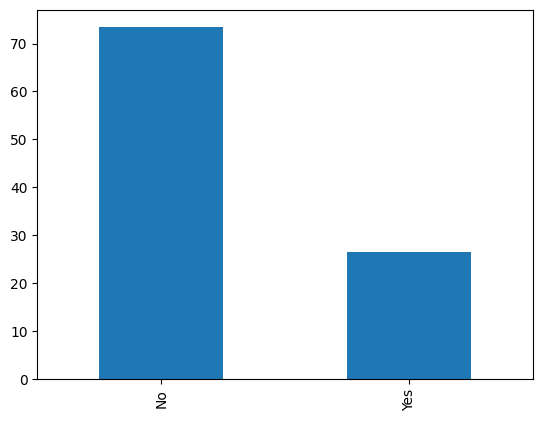

In [17]:
dependent_var.plot(kind='bar')

**this is class emblance**

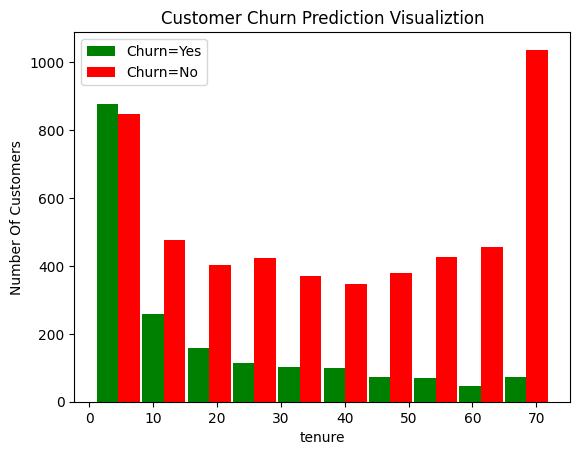

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

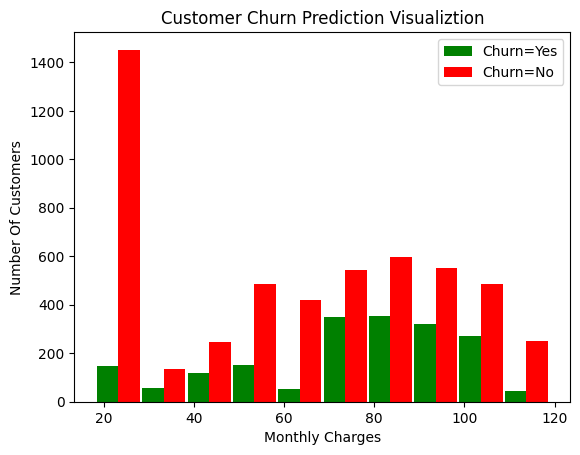

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')



In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [23]:
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:

df1['gender'].replace({'Female':1,'Male':0},inplace=True)

**One hot encoding for categorical columns**

In [27]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5360,0,0,1,1,5,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4687,0,0,1,0,22,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1423,0,0,1,0,15,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6188,0,0,0,0,18,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1518,1,0,0,0,5,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [31]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Train test split**

In [32]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

**Build a model (ANN) in tensorflow/keras**

In [35]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25)

Epoch 1/25
176/176 [==============================] - 7s 3ms/step - loss: 0.4821 - accuracy: 0.7556
Epoch 2/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7900
Epoch 3/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8007
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8014
Epoch 5/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8034
Epoch 6/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8068
Epoch 7/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4095 - accuracy: 0.8034
Epoch 8/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8052
Epoch 9/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8075
Epoch 10/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8078

In [36]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.4479 - accuracy: 0.7818


[0.447895884513855, 0.7818052768707275]

In [37]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 1s 4ms/step


array([[0.16562961],
       [0.41084227],
       [0.0063811 ],
       [0.78654534],
       [0.4781296 ]], dtype=float32)

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [40]:
y_test[:10].values

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       999
           1       0.67      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



**f1-score for class 1 is very low**

Text(95.72222222222221, 0.5, 'Truth')

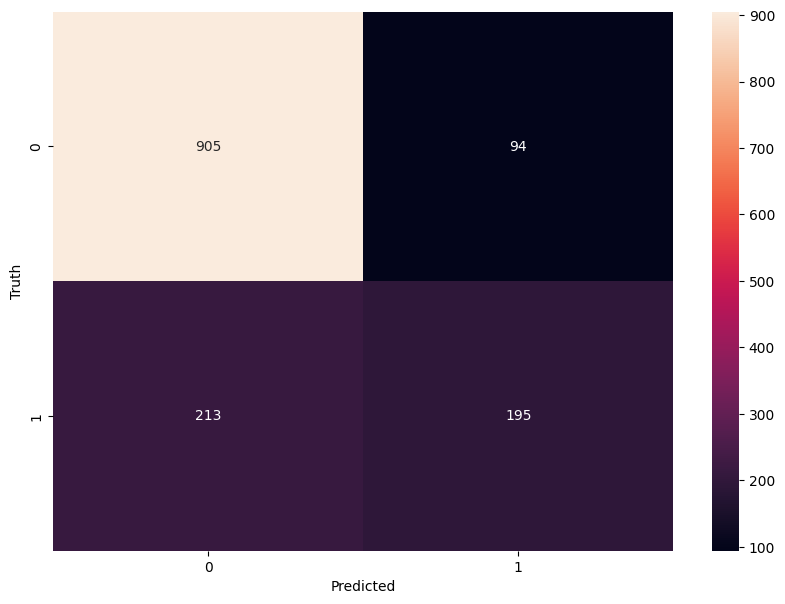

In [42]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Class Emblance

In [43]:
y_test.value_counts(normalize=True)*100

0    71.002132
1    28.997868
Name: Churn, dtype: float64

the class is emblance have some technique to solve this problem and run the ann model

# How to Handle Class Imbalance?

Handling class imbalance can improve the performance and robustness of machine learning models, and ensure that they generalize well to new data. It can also lead to more accurate and meaningful evaluation metrics that reflect the true performance of the model in each class.

- **There are numerous techniques to handle class imbalance.**

1. Undersampling
2. Oversampling (SMOTE)
3. Ensemble Method
4. Class Weights
5. Focal Loss

In [50]:
# Create a function because call all the time

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=25)
    else:
        model.fit(X_train, y_train, epochs=25, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

## Method 1: Undersampling

In [51]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [52]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [53]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
94/94 [==============================] - 1s 3ms/step - loss: 0.6355 - accuracy: 0.6505
Epoch 2/25
94/94 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7415
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7508
Epoch 4/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7575
Epoch 5/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7552
Epoch 6/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7565
Epoch 7/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7619
Epoch 8/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.7565
Epoch 9/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7622
Epoch 10/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7635
Epoch 11/25
94/94 [

**Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score**

## 2. Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
259/259 [==============================] - 2s 3ms/step - loss: 0.5546 - accuracy: 0.7275
Epoch 2/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4911 - accuracy: 0.7622
Epoch 3/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7660
Epoch 4/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7717
Epoch 5/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7738
Epoch 6/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7758
Epoch 7/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.7765
Epoch 8/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4668 - accuracy: 0.7763
Epoch 9/25
259/259 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.7776
Epoch 10/25
259/259 [==============================] - 1s 5ms/step - loss: 0.4623 - accuracy: 0.7824

**Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score**

## Method3: SMOTE

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
! pip install imblearn

In [64]:
! pip install SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=0)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()




0    5163
1    5163
Name: Churn, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [71]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
259/259 [==============================] - 2s 3ms/step - loss: 0.5369 - accuracy: 0.7207
Epoch 2/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4744 - accuracy: 0.7771
Epoch 3/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7804
Epoch 4/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7823
Epoch 5/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.7831
Epoch 6/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.7883
Epoch 7/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.7879
Epoch 8/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7896
Epoch 9/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7921
Epoch 10/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.7977

**SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80**

## Method4: Use of Ensemble with undersampling

In [73]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [74]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [76]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [77]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [78]:
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [79]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [80]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [81]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
94/94 [==============================] - 2s 5ms/step - loss: 0.6257 - accuracy: 0.6629
Epoch 2/25
94/94 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.7579
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7649
Epoch 4/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7732
Epoch 5/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7709
Epoch 6/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7709
Epoch 7/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7699
Epoch 8/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7739
Epoch 9/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7766
Epoch 10/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7749
Epoch 11/25
94/94 [

In [82]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
94/94 [==============================] - 2s 3ms/step - loss: 0.6152 - accuracy: 0.7020
Epoch 2/25
94/94 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7585
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7562
Epoch 4/25
94/94 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7622
Epoch 5/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7649
Epoch 6/25
94/94 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.7682
Epoch 7/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4704 - accuracy: 0.7682
Epoch 8/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7669
Epoch 9/25
94/94 [==============================] - 0s 5ms/step - loss: 0.4652 - accuracy: 0.7702
Epoch 10/25
94/94 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7716
Epoch 11/25
94/94 [

In [83]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/25
83/83 [==============================] - 1s 3ms/step - loss: 0.6340 - accuracy: 0.6607
Epoch 2/25
83/83 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7586
Epoch 3/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7670
Epoch 4/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7712
Epoch 5/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7776
Epoch 6/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7791
Epoch 7/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7799
Epoch 8/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7795
Epoch 9/25
83/83 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.7852
Epoch 10/25
83/83 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7856
Epoch 11/25
83/83 [

In [84]:
len(y_pred1)

1407

In [85]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [86]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407

